# Data preprocessing

In [56]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
#preparing training dataset
def preprocessor(ts_array, step):
    X, y = [], []
    for each in range(0, len(ts_array) - (step+1)):
        end_dex = each + step
        #n elements into x
        X.append(ts_array[each:end_dex])
        #element after n is label
        y.append(ts_array[end_dex])
    return np.array(X), np.array(y)

In [3]:
#read data
with open("./data/carpark_imputed_nonull.json", "r") as f:
    dataset = json.load(f)

In [84]:
#train test split
#training is 2 weeks prior to test
ts_array = dataset["HE12"]["util_pct"]
test_array = ts_array[-24:]
train_array = ts_array[-360:-24]

In [85]:
n_steps = 5
X, y = preprocessor(train_array, n_steps)

In [86]:
#reshape
X = X.reshape((X.shape[0], X.shape[1], 1))

In [87]:
X.shape

(330, 5, 1)

In [88]:
y.shape

(330,)

## Building LSTM model

In [74]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [89]:
#model architecture
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [102]:
#fit model
model.fit(X, y, epochs=600)

Epoch 1/600
11/11 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 2/600
11/11 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 3/600
11/11 [==============================] - 0s 6ms/step - loss: 0.0034
Epoch 4/600
11/11 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 5/600
11/11 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 6/600
11/11 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 7/600
11/11 [==============================] - 0s 6ms/step - loss: 0.0034
Epoch 8/600
11/11 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 9/600
11/11 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 10/600
11/11 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 11/600
11/11 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 12/600
11/11 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 13/600
11/11 [=================

In [119]:
#prediction for 24 hours into the future
x_input = train_array[-(n_steps):]
temp_input = list(x_input)
lst_output = []

for i in range(24):
    x_input = np.array(temp_input).reshape((1,n_steps,1))
    pred_y = model.predict(x_input, verbose=0)
    lst_output.append(pred_y[0][0])
    temp_input.append(pred_y[0][0])
    temp_input = temp_input[1:]

In [128]:
#f1 score
y_true = np.array(test_array)
y_pred = np.array(lst_output)

print(1-(((y_true - y_pred) ** 2).sum())/(((y_true - y_true.mean()) ** 2).sum()))

-0.18867291710592582


In [121]:
type(test_array[0])

float

In [122]:
type(lst_output[0])

numpy.float32

In [123]:
train_dex = np.arange(1, len(train_array)+1)
pred_dex = np.arange(len(train_array)+1, (len(train_array)+1 + len(lst_output)))

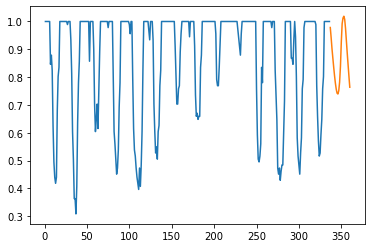

In [124]:
plt.plot(train_dex, train_array)
plt.plot(pred_dex, lst_output)

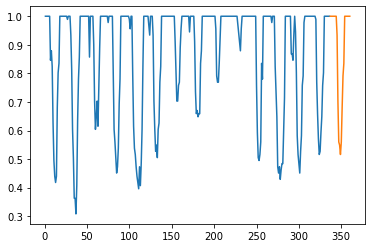

In [125]:
plt.plot(train_dex, train_array)
plt.plot(pred_dex, test_array)